In [24]:
import os
import zstandard as zstd
import json
import matplotlib.pyplot as plt
import databento as dbn  # T'as intérêt à avoir installé les libs dbn et zstandard, sinon ça va pas le faire
import pandas as pd

In [40]:

def decompress_zst(zst_path, extract_path):
    """Décompresse un fichier zst comme un boss."""
    with open(zst_path, 'rb') as zst_file:
        dctx = zstd.ZstdDecompressor()
        with open(extract_path, 'wb') as out_file:
            dctx.copy_stream(zst_file, out_file)
    print(f"Bam ! Fichier décompressé dans : {extract_path}")

def load_metadata(metadata_path):
    """Charge les métadonnées du fichier JSON, fastoche."""
    with open(metadata_path, 'r') as f:
        return json.load(f)

def load_symbology(symbology_path):
    """Charge la symbologie du fichier JSON, rien de ouf."""
    with open(symbology_path, 'r') as f:
        return json.load(f)
def visualize_orderbook(dbn_file, symbol):
    """Visualise le carnet d'ordres pour un symbole donné en utilisant @databento."""
    try:
        # On crée un DBNStore à partir du chemin du fichier
        store = dbn.DBNStore.from_file(dbn_file)
        
        # On récupère les données pour le symbole spécifié
        df = store.to_df( # Assurez-vous que c'est le bon schéma pour vos données
        )
    except FileNotFoundError:
        print(f"Erreur : Le fichier {dbn_file} n'a pas été trouvé.")
        return
    except Exception as e:
        print(f"Une erreur s'est produite lors de la lecture du fichier : {str(e)}")
        return
    
    # On vérifie si des données ont été récupérées
    if df.empty:
        print(f"Aucune donnée n'a été trouvée pour le symbole {symbol}")
        return
    
    # On extrait les données pertinentes
    df['timestamp'] = pd.to_datetime(df['ts_event'], unit='ns')
    bids = df[df['side'] == 'B']['price']
    asks = df[df['side'] == 'A']['price']
    timestamps = df['timestamp']
    
    # On balance un graphique de ouf
    plt.figure(figsize=(12, 6))
    plt.scatter(timestamps[df['side'] == 'B'], bids, label='Bid', color='green', alpha=0.5, s=10)
    plt.scatter(timestamps[df['side'] == 'A'], asks, label='Ask', color='red', alpha=0.5, s=10)
    plt.title(f"Carnet d'ordres pour {symbol}, ça déchire sa mère")
    plt.xlabel("Temps")
    plt.ylabel("Prix")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


def main():
    # Le chemin vers le dossier avec tous les trucs dedans
    folder_path = "data"
    
    # On décompresse le fichier zst s'il y en a un
    zst_files = [f for f in os.listdir(folder_path) if f.endswith('.zst')]
    if zst_files:
        zst_path = os.path.join(folder_path, zst_files[0])
        extract_path = os.path.join(folder_path, zst_files[0][:-4]+".dbn")  # On enlève l'extension .zst
        decompress_zst(zst_path, extract_path)
    
    # On charge les métadonnées et la symbologie
    metadata = load_metadata(os.path.join(folder_path, "metadata.json"))
    symbology = load_symbology(os.path.join(folder_path, "symbology.json"))
    
    # On cherche le fichier DBN, ça devrait pas trop galère
    dbn_files = [f for f in os.listdir(folder_path) if f.endswith('.dbn')]
    if not dbn_files:
        print("Merde, pas de fichier DBN dans le dossier.")
        return
    
    dbn_file = os.path.join(folder_path, dbn_files[0])
    
    # On visualise le carnet d'ordres pour chaque symbole
    for symbol in symbology['symbols']:
        visualize_orderbook(dbn_file, symbol)


Bam ! Fichier décompressé dans : data/test.dbn


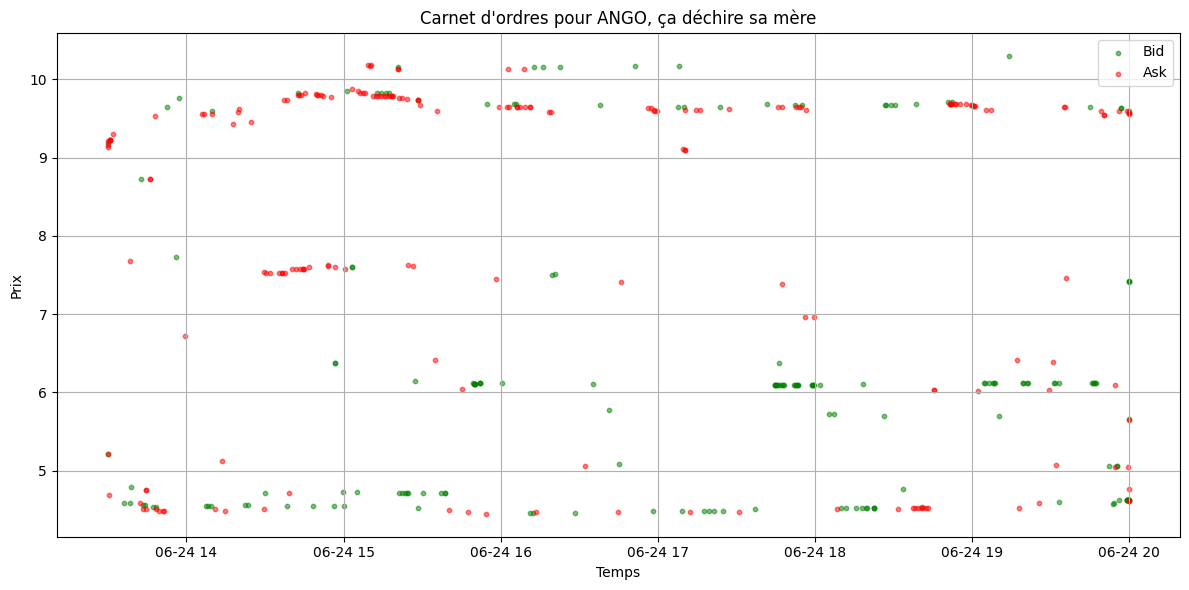

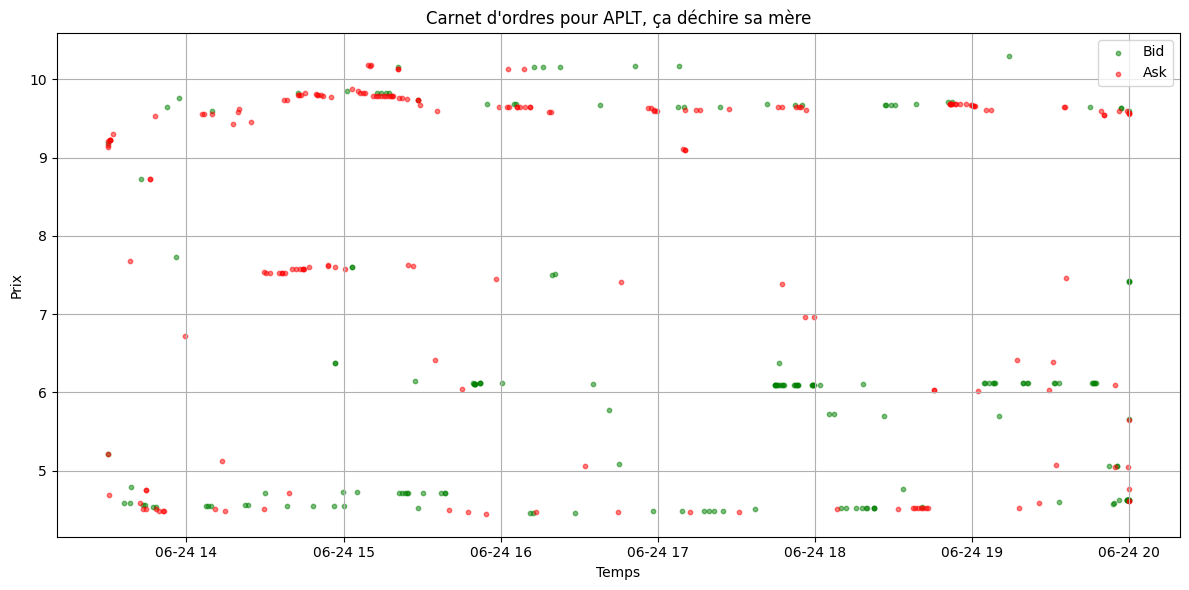

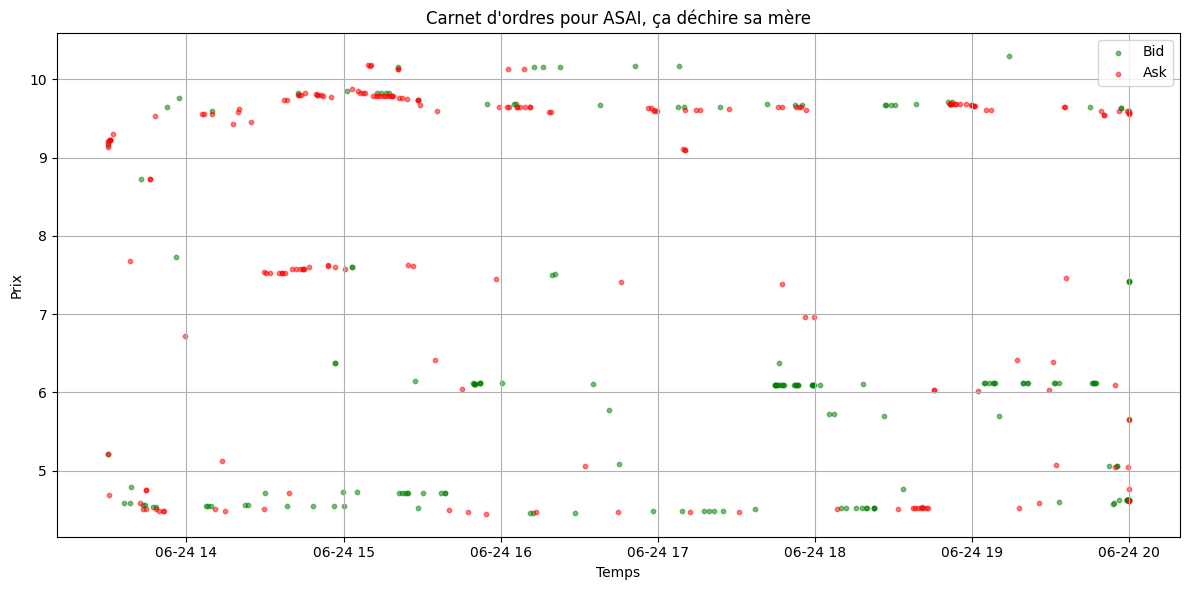

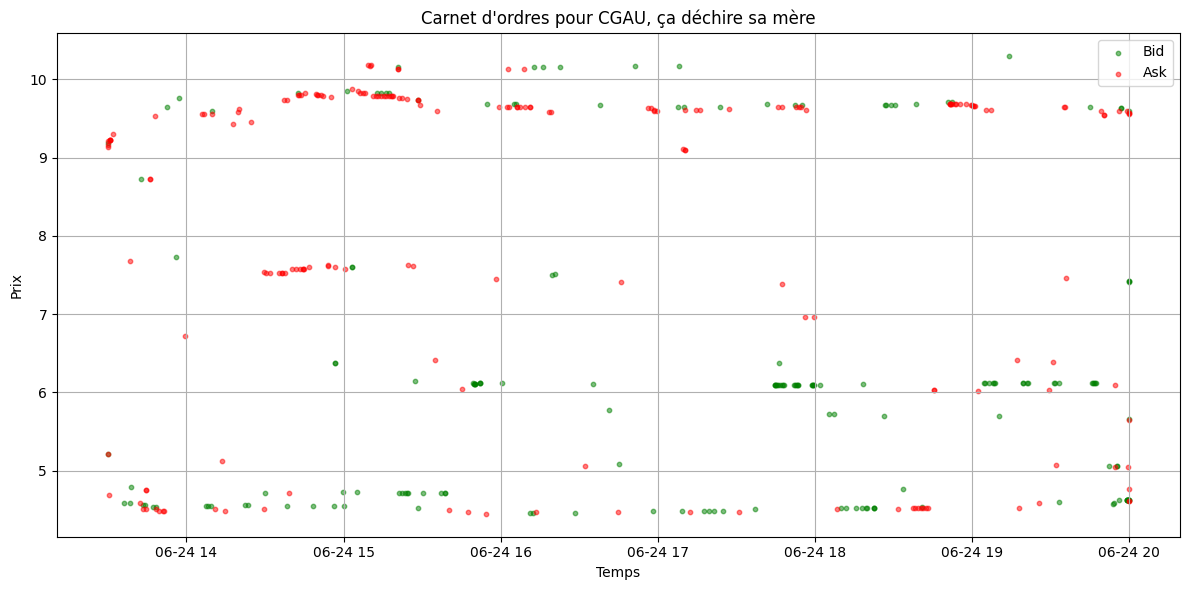

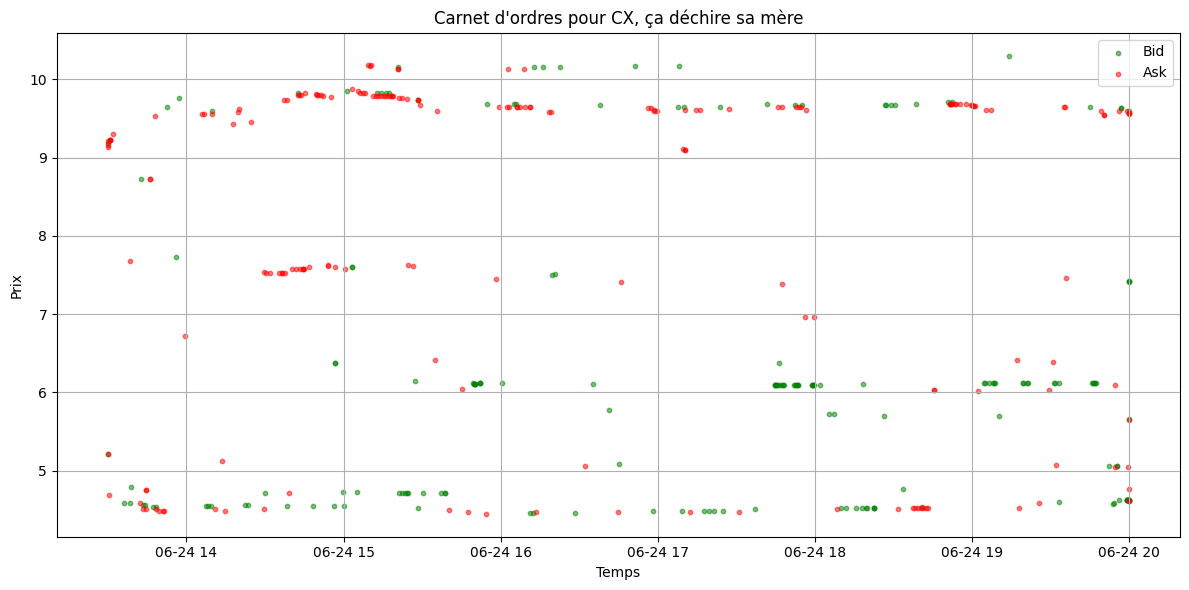

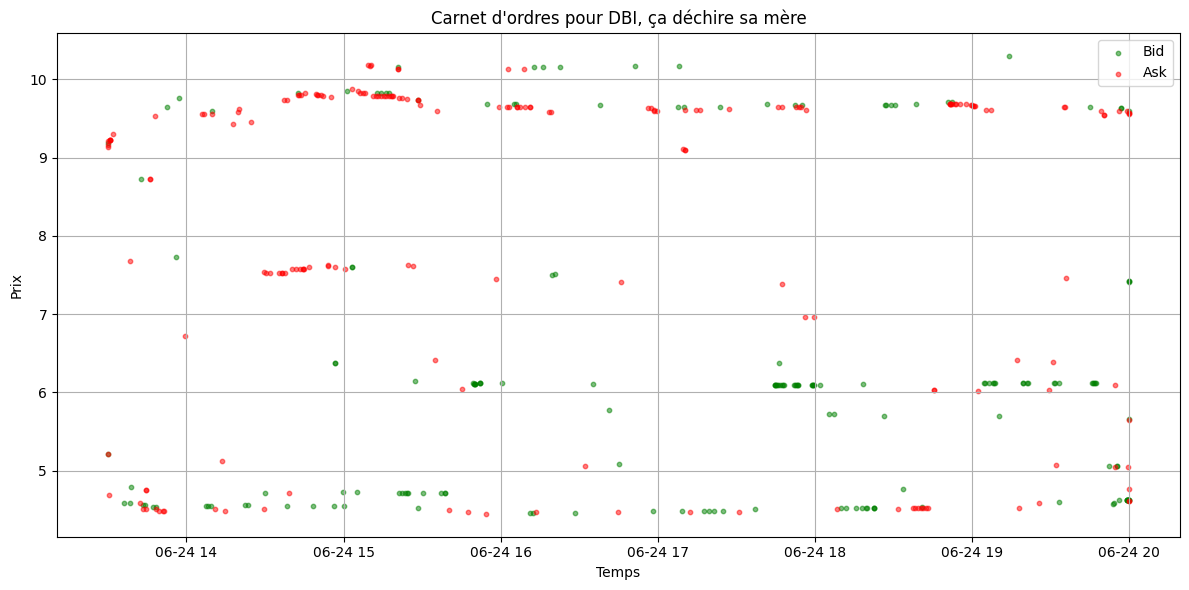

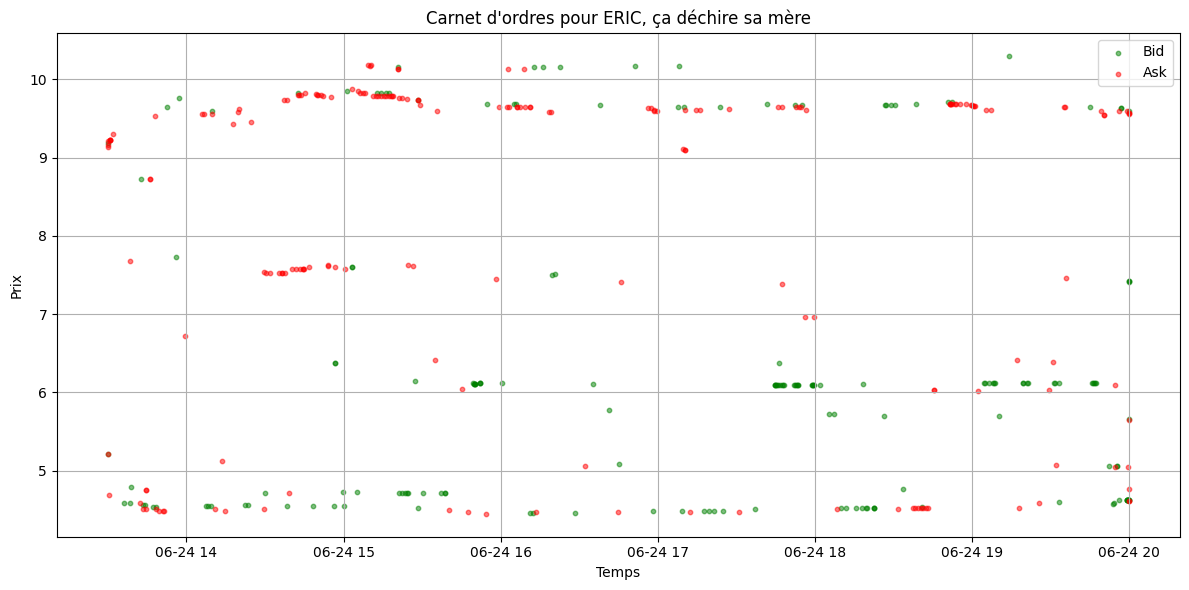

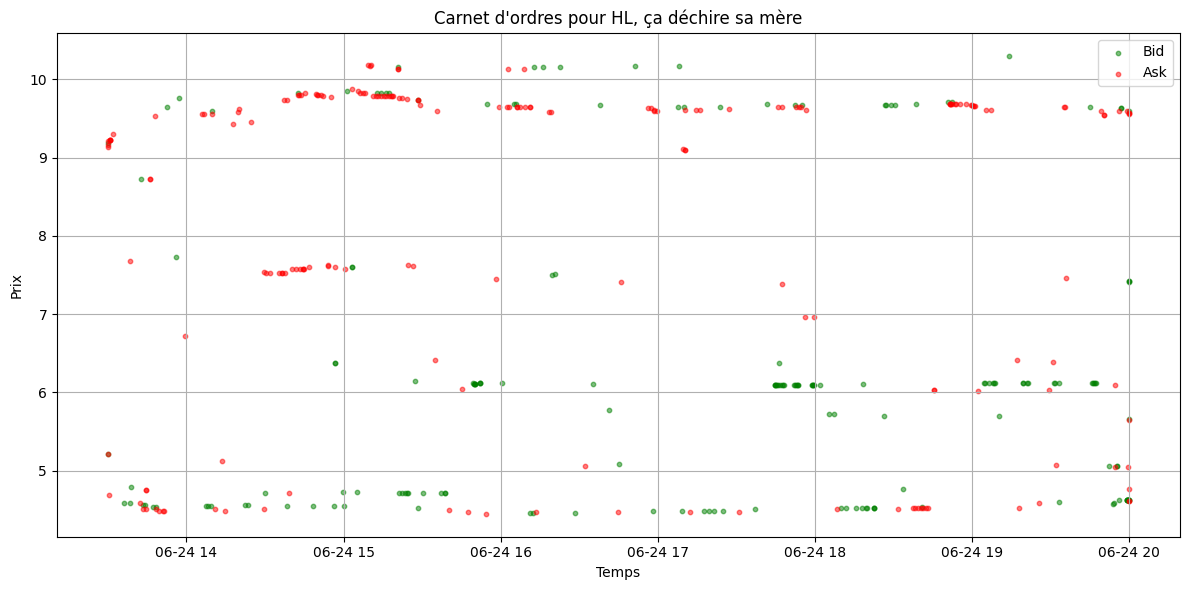

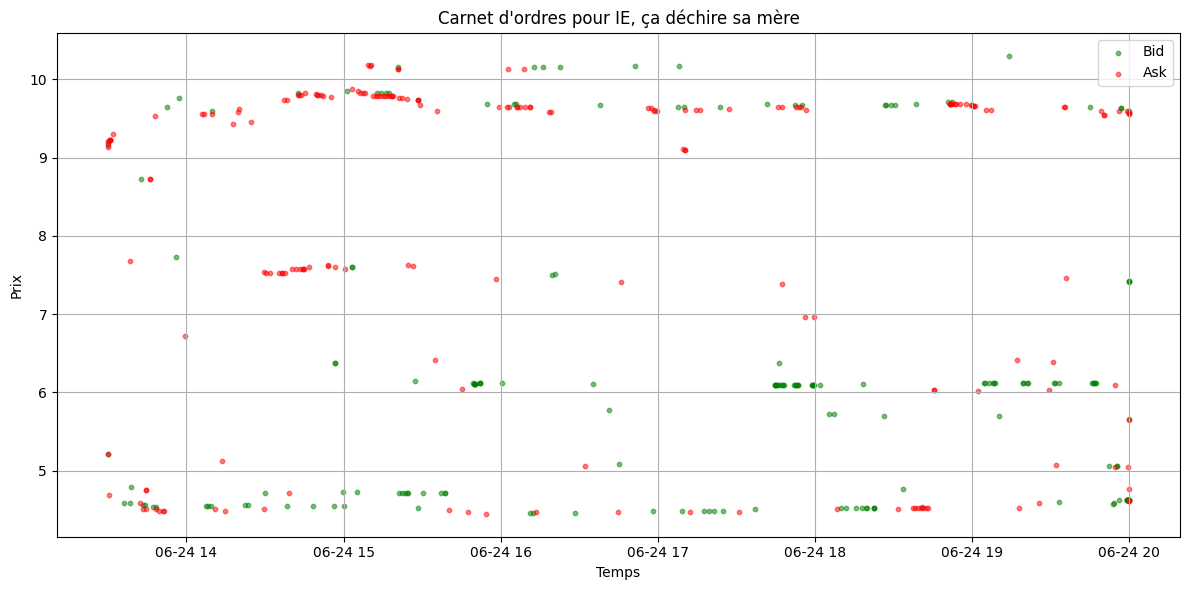

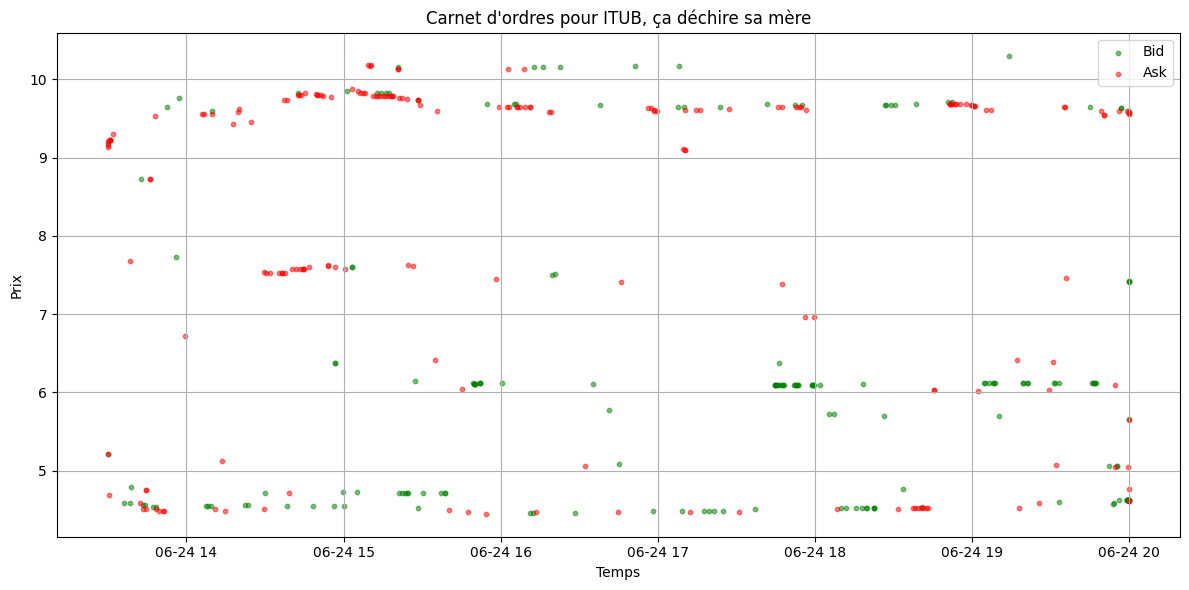

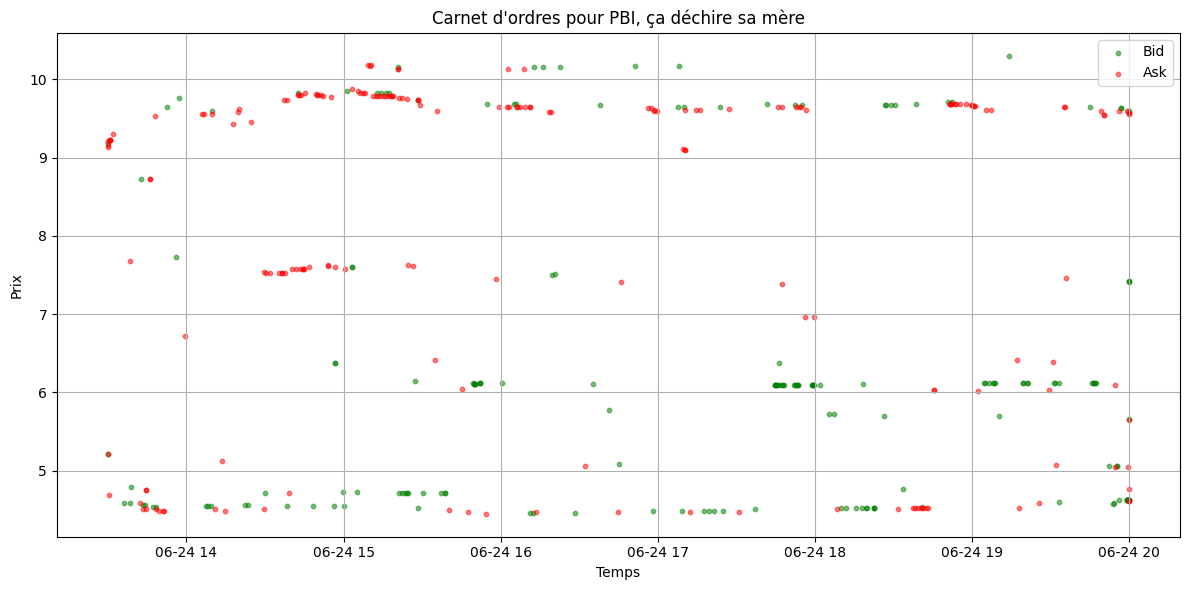

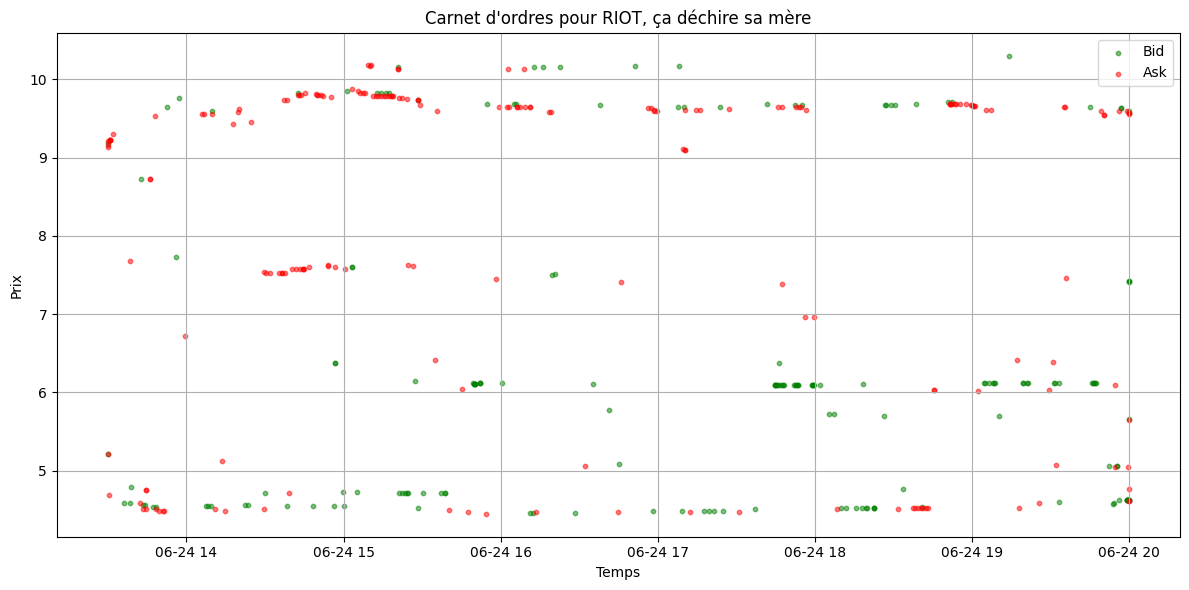

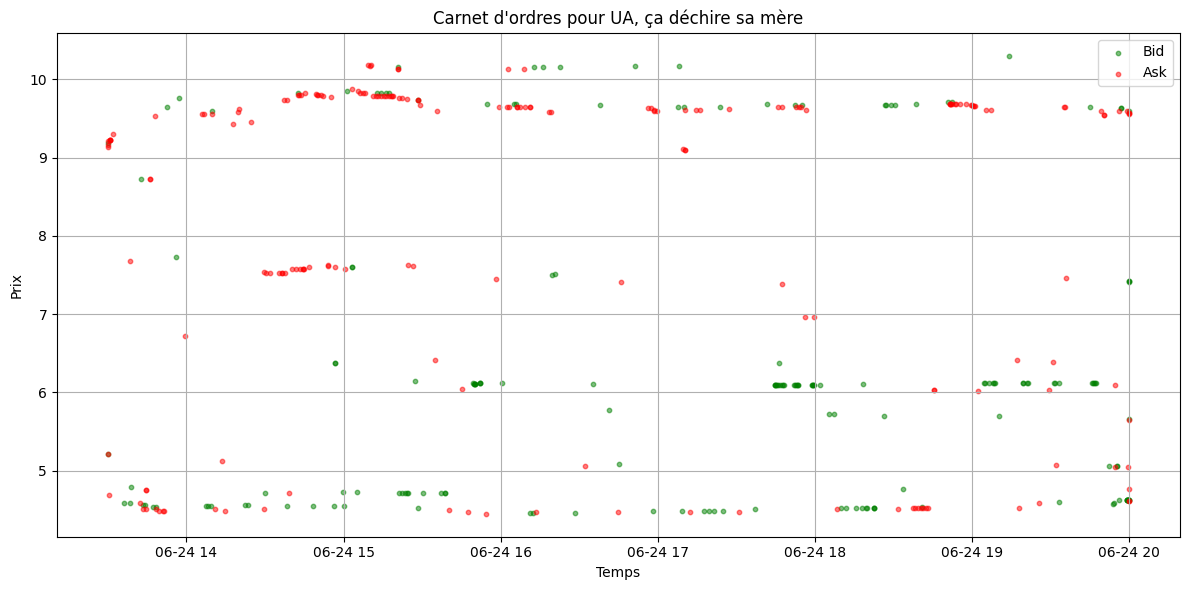

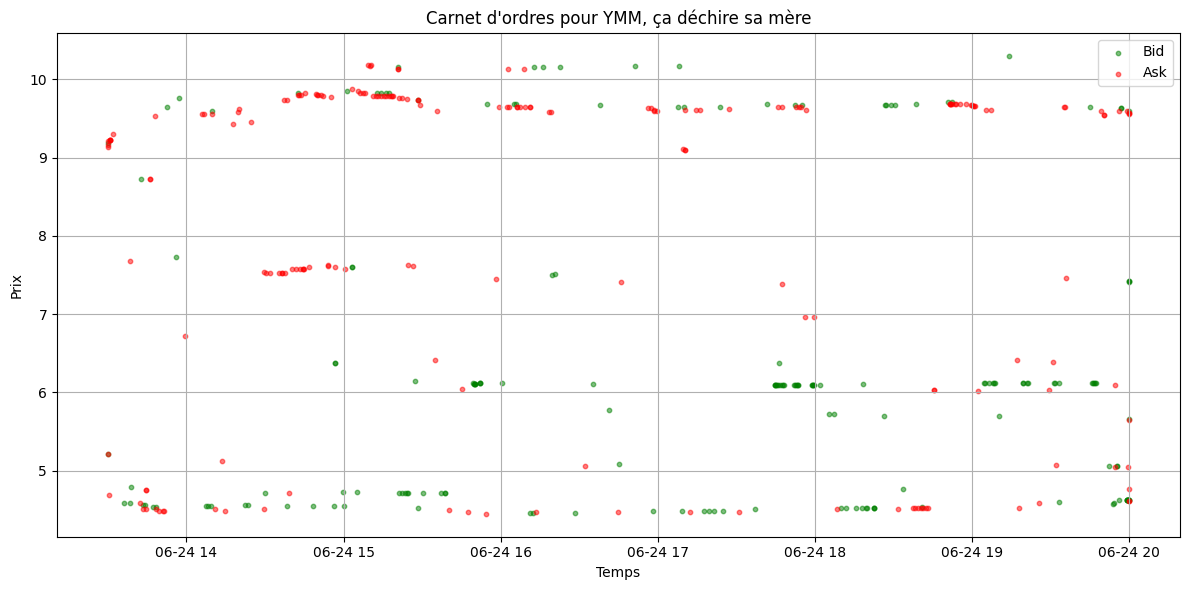

Bam ! Fichier décompressé dans : data/test


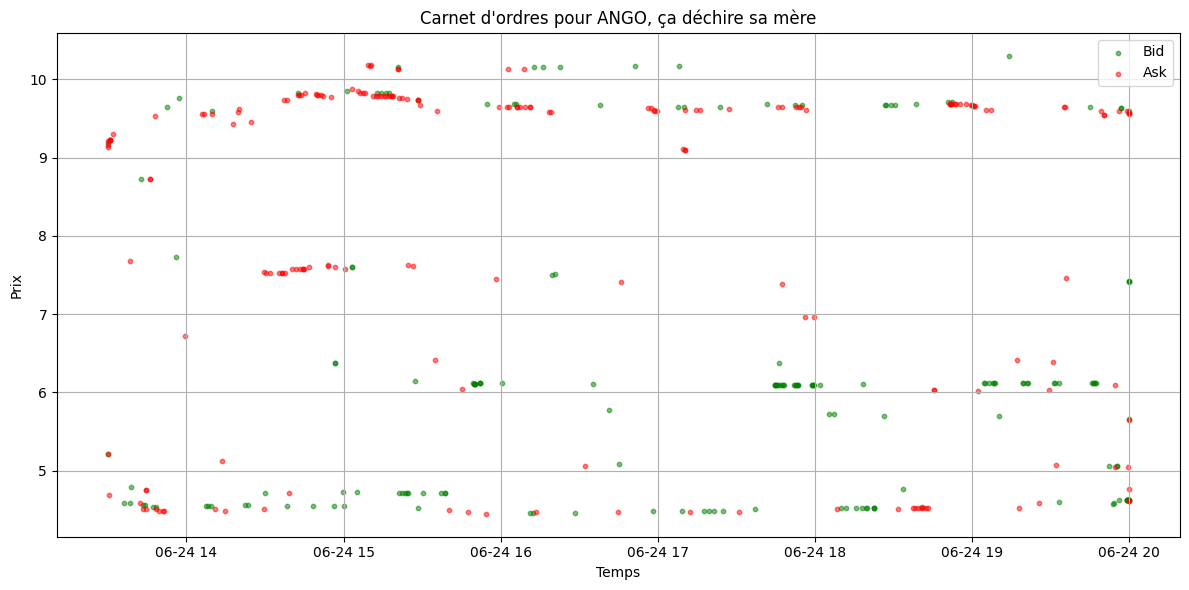

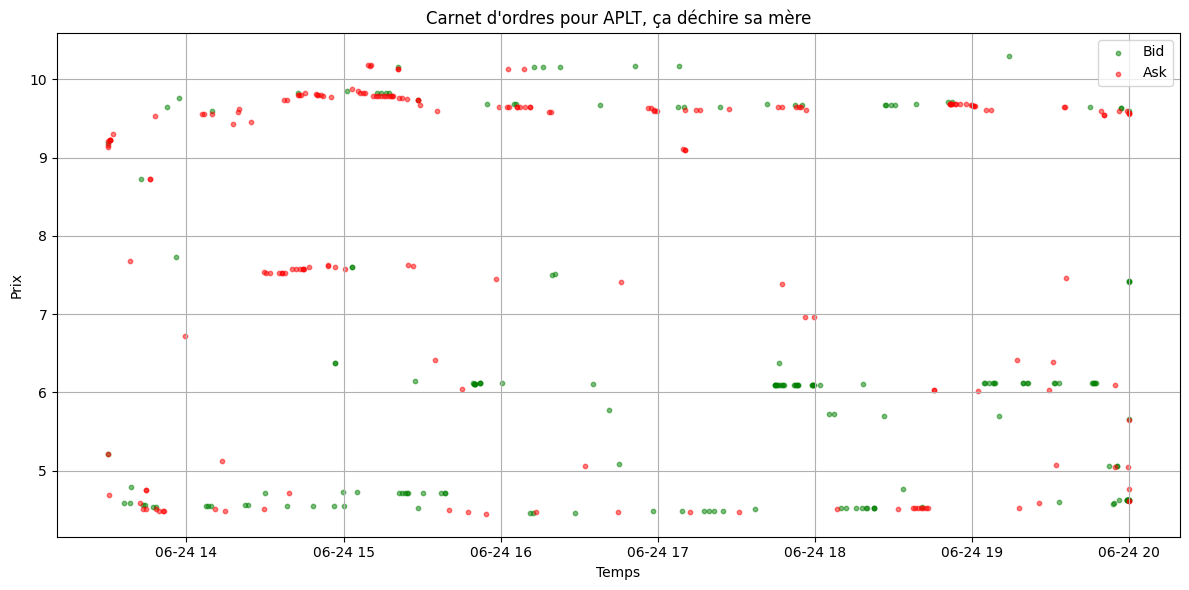

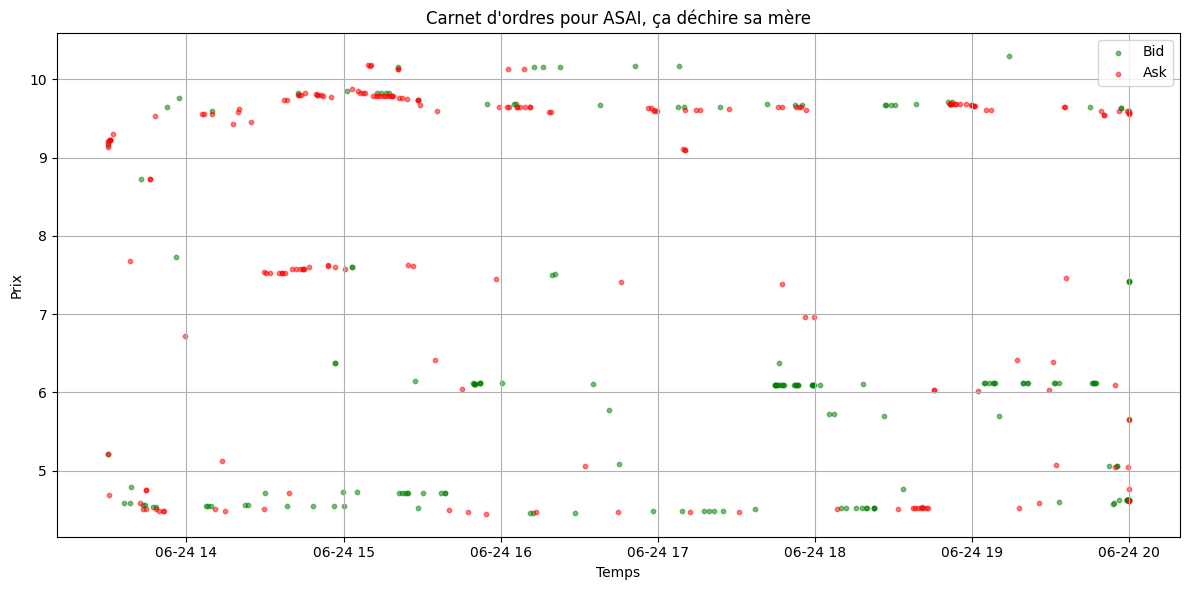

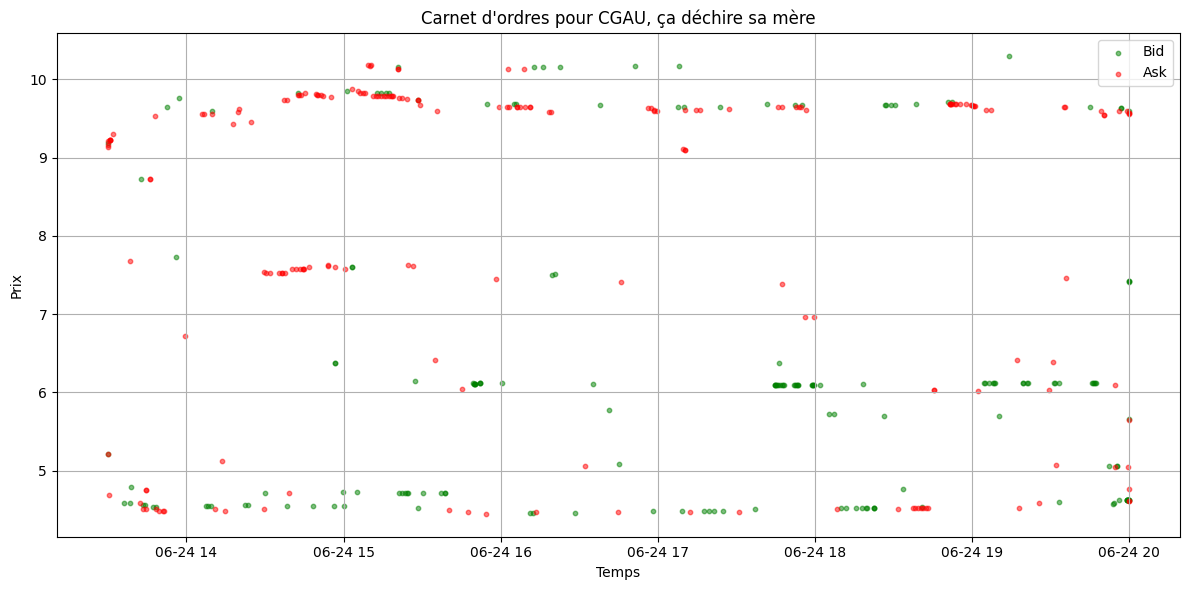

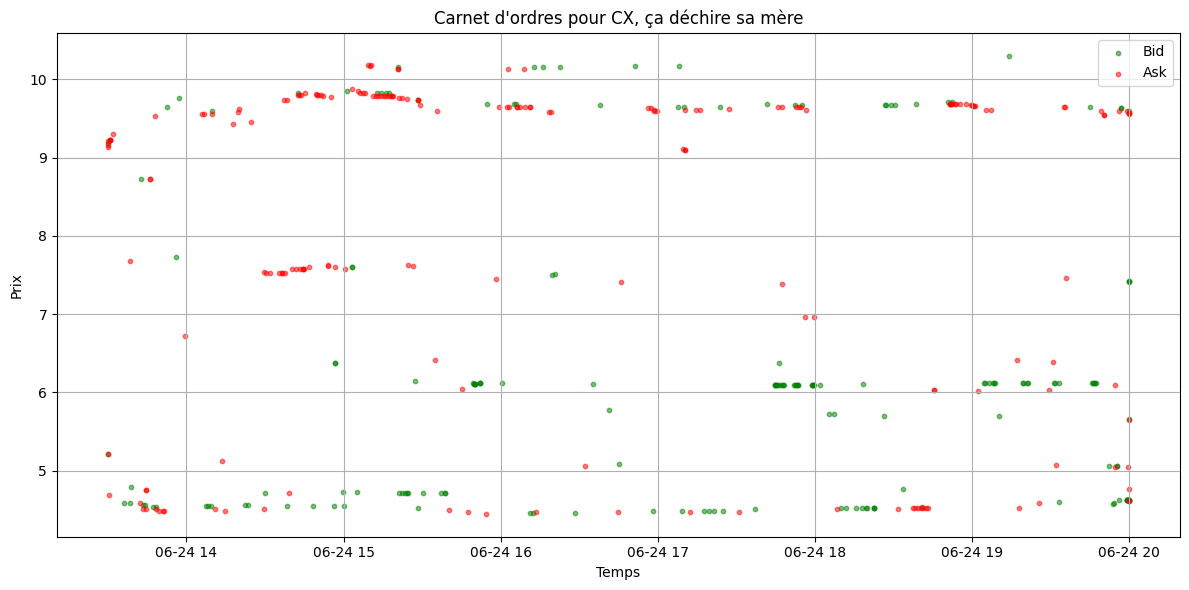

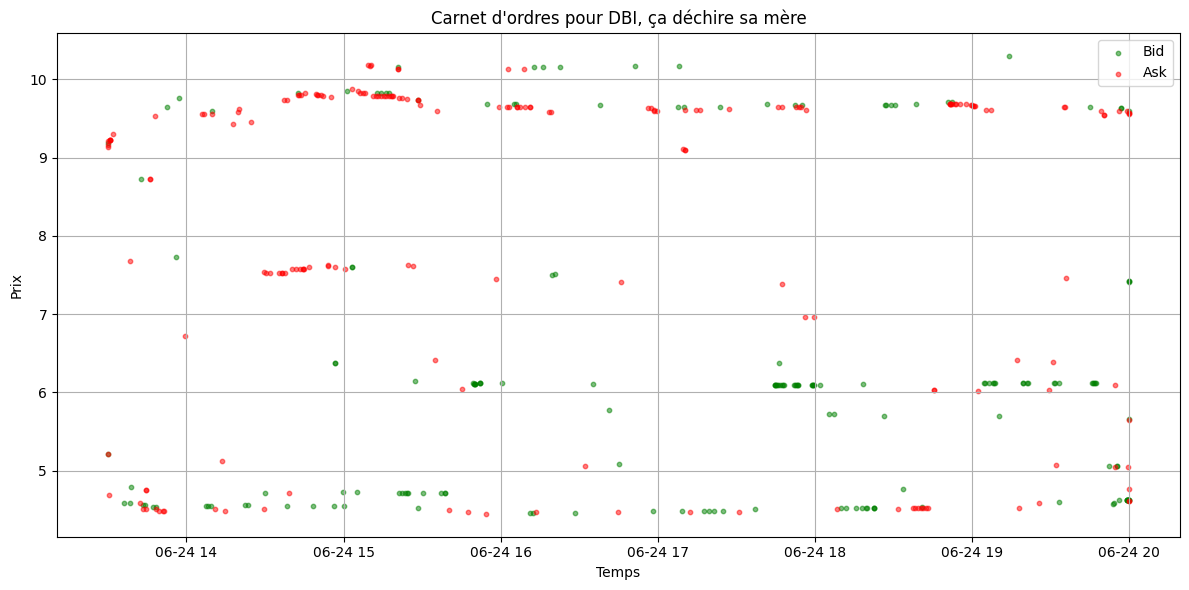

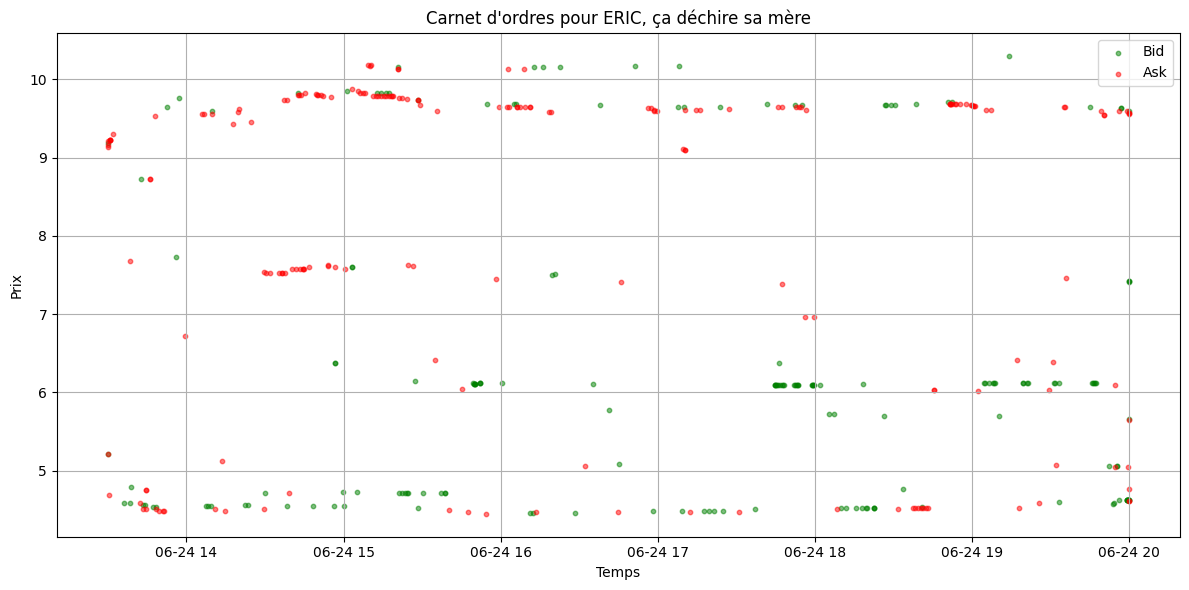

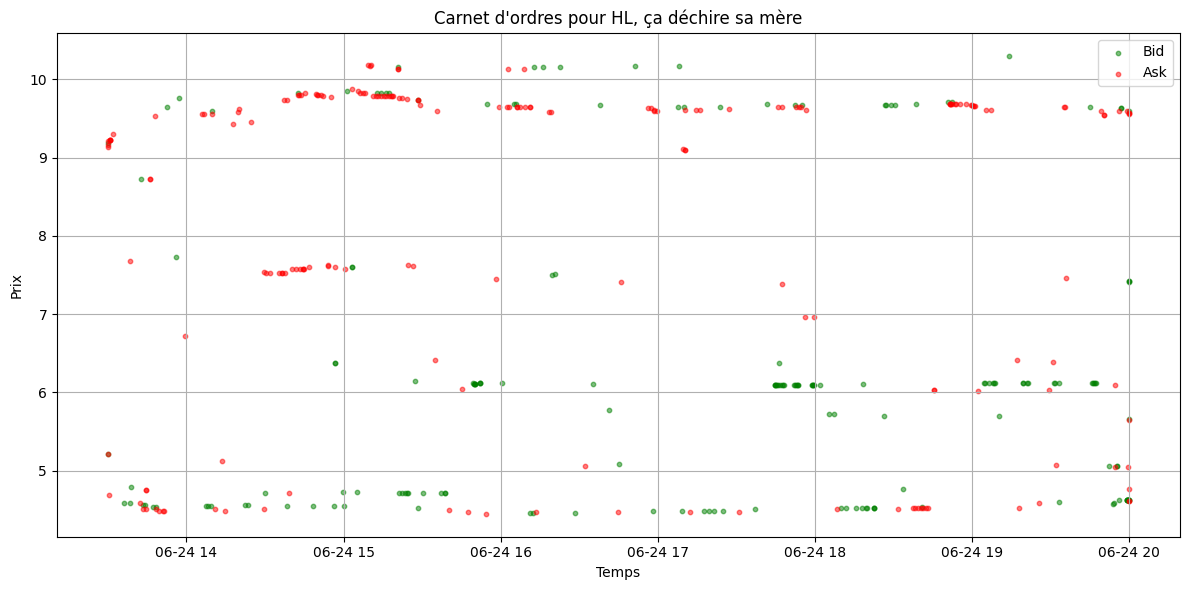

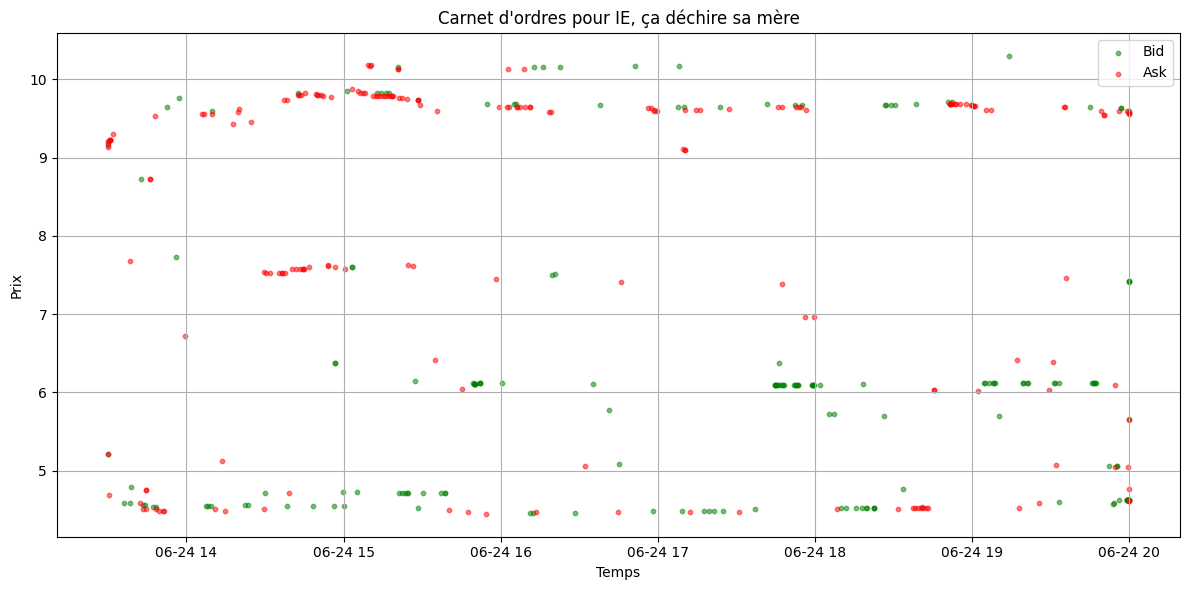

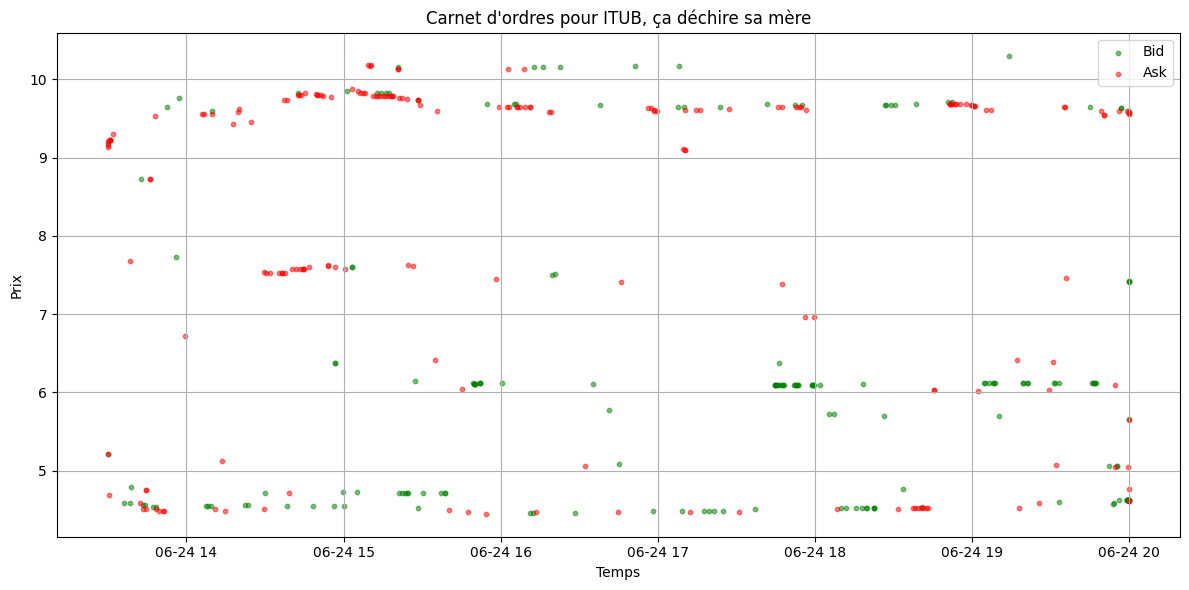

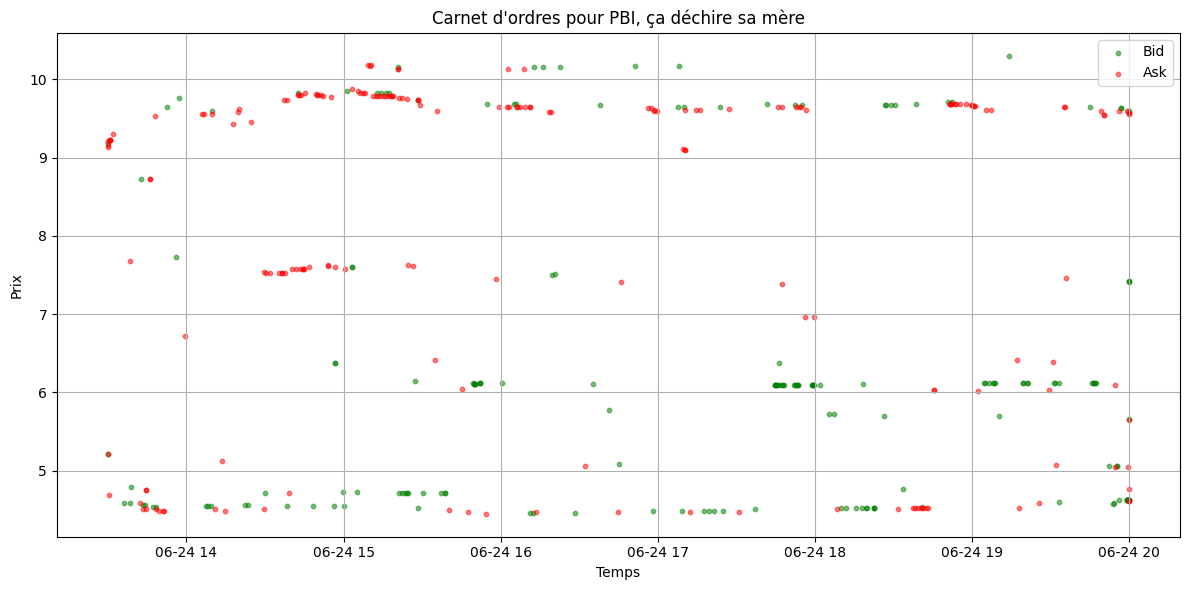

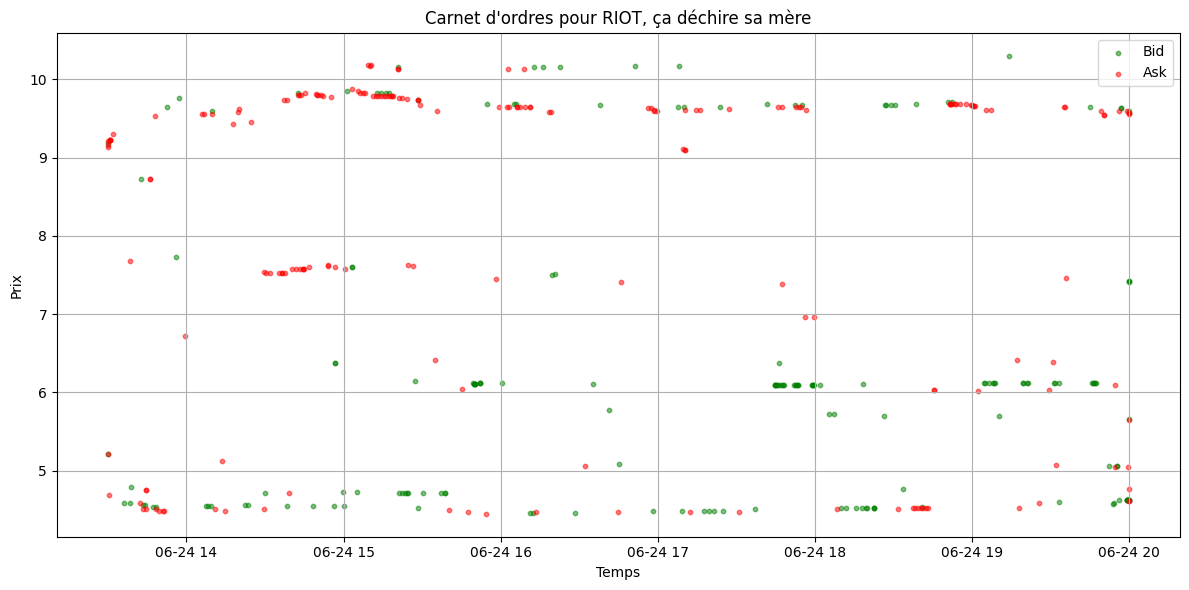

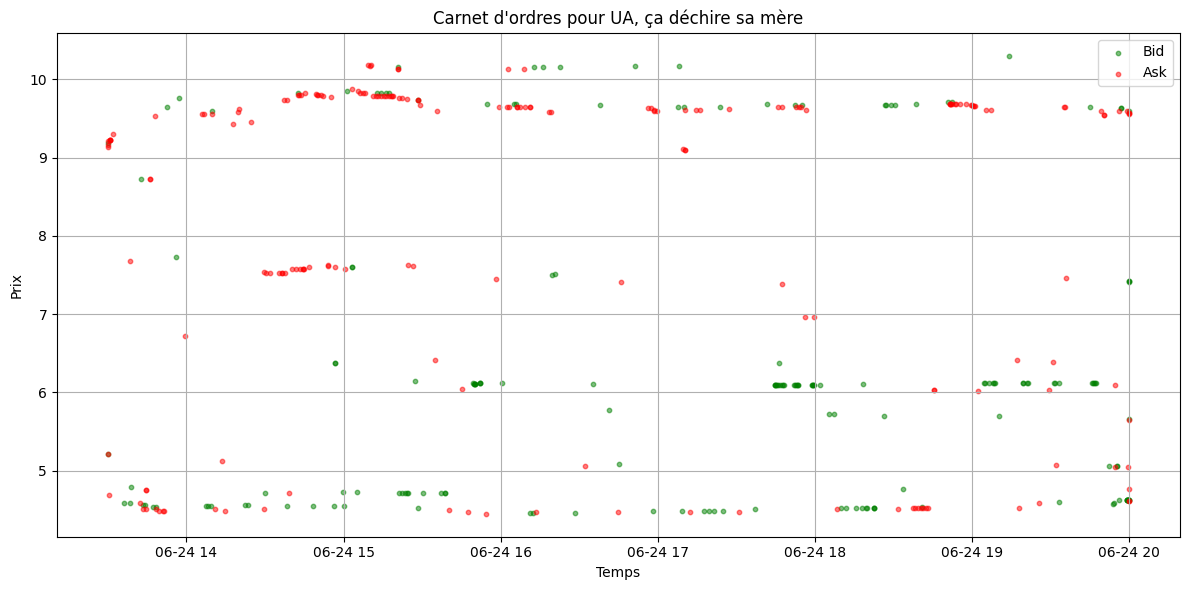

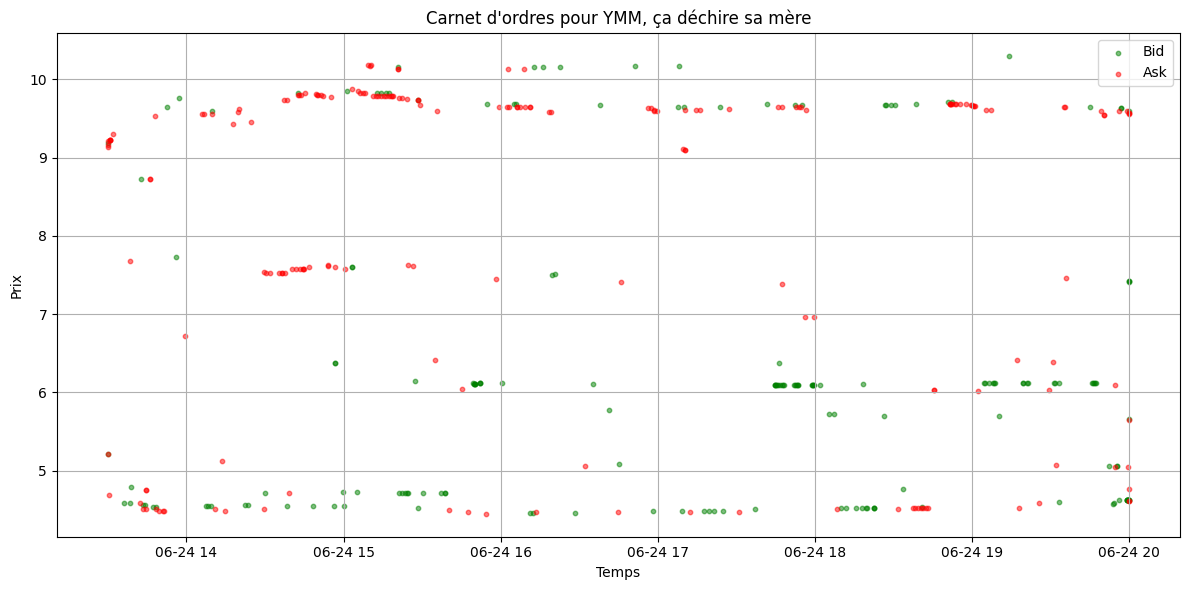

In [41]:

if __name__ == "__main__":
    main()
    
    # On applique le tout à test.zst
    specific_zst_path = "data/test.zst"
    specific_extract_path = specific_zst_path[:-4]  # On enlève l'extension .zst
    decompress_zst(specific_zst_path, specific_extract_path)
    
    # On charge les métadonnées et la symbologie spécifiques si elles existent
    specific_folder = os.path.dirname(specific_zst_path)
    specific_metadata = load_metadata(os.path.join(specific_folder, "metadata.json"))
    specific_symbology = load_symbology(os.path.join(specific_folder, "symbology.json"))
    
    # On cherche le fichier DBN spécifique
    specific_dbn_files = [f for f in os.listdir(specific_folder) if f.endswith('.dbn')]
    if not specific_dbn_files:
        print("Pas de fichier DBN dans le dossier spécifique.")
    else:
        specific_dbn_file = os.path.join(specific_folder, specific_dbn_files[0])
        # On visualise le carnet d'ordres pour chaque symbole spécifique
        for symbol in specific_symbology['symbols']:
            visualize_orderbook(specific_dbn_file, symbol)
